In [ ]:
#Stage 1 process contains the data analysis of sepsis occurance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

Stage 1 of mortality analysis of sepsis( data analysis of occuring sepsis)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset.csv')
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [ ]:
# By default , python displays few rows and columns.
# Set the below parameters so that all rows and columns would be visible

#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [3]:
df.shape

(1552210, 44)

In [4]:
df.tail()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
1552205,21,21,83.0,99.0,NaN,121.0,77.0,54.0,22.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,22,0,113911
1552206,22,22,80.0,92.0,NaN,102.0,73.0,51.0,24.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,23,0,113911
1552207,23,23,95.0,97.0,36.7,128.5,83.0,58.5,25.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,24,0,113911
1552208,24,24,104.0,99.0,NaN,127.0,85.0,59.0,24.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,25,0,113911
1552209,25,25,94.5,99.0,NaN,112.0,81.0,56.0,22.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,26,0,113911


In [5]:
# display datatype of each column
df.dtypes

Unnamed: 0            int64
Hour                  int64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           

Measurement Description
1) HR Heart rate (beats per minute) .
2) O2Sat Pulse oximetry (%) .
3) Temp Temperature (deg C) .
4) SBP Systolic BP (mm Hg) .
5) MAP Mean arterial pressure (mm Hg) .
6) DBP Diastolic BP (mm Hg) .
7) Resp Respiration rate (breaths per minute) .
8) EtCO2 End tidal carbon dioxide (mm Hg) .
9) BaseExcess Excess bicarbonate (mmol/L) .
10) HCO3 Bicarbonate (mmol/L) .
11) FiO2 Fraction of inspired oxygen (%) .
12) pH pH .
13) PaCO2 Partial pressure of carbon dioxide from arterial blood (mm Hg) .
14) SaO2 Oxygen saturation from arterial blood (%) .
15) AST Aspartate transaminase (IU/L) .
16) BUN Blood urea nitrogen (mg/dL) .
17) Alkalinephos Alkaline phosphatase (IU/L) .
18) Calcium Calcium (mg/dL) .
19) Chloride Chloride (mmol/L) .
20) Creatinine Creatinine (mg/dL) .
21) Bilirubin direct Direct bilirubin (mg/dL) .
22) Glucose Serum glucose (mg/dL) .
23) Lactate Lactic acid (mg/dL) .
24) Magnesium Magnesium (mmol/dL) .
25) Phosphate Phosphate (mg/dL) .
26) Potassium Potassiam (mmol/L) .
27) Bilirubin total Total bilirubin (mg/dL) .
28) TroponinI Troponin I (ng/mL) .
29) Hct Hematocrit (%) .
30) Hgb Hemoglobin (g/dL) .
31) PTT Partial thromboplastin time (seconds) .
32) WBC Leukocyte count (count/L) .
33) Fibrinogen Fibrinogen concentration (mg/dL) .
34) Platelets Platelet count (count/mL) .
35) Age Age (years) .
36) Gender Female (0) or male (1) .
37) Unit1 Administrative identifier for ICU unit (MICU); false (0) or true (1) .
38) Unit2 Administrative identifier for ICU unit (SICU); false (0) or true (1) .
39) HospAdmTime Time between hospital and ICU admission (hours since ICU admission) .
40) ICULOS ICU length of stay (hours since ICU admission) .
41) SepsisLabel For septic patients, SepsisLabel is 1 if t ≥ tsepsis −6 and 0 if t < tsepsis −6.
For non-septic patients, SepsisLabel is 0.


In [6]:
df.shape

(1552210, 44)

<Axes: >

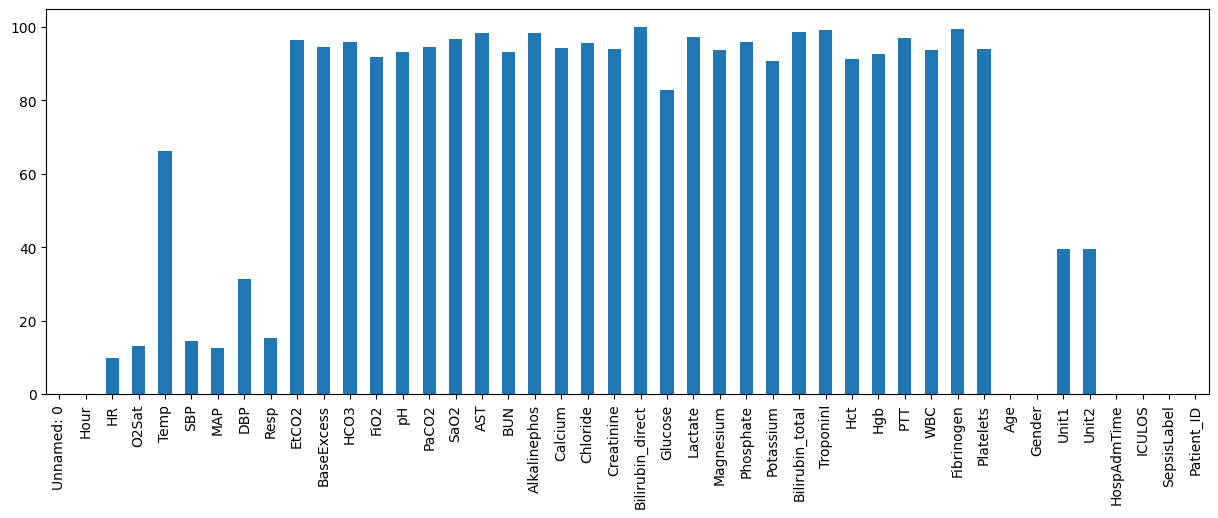

In [7]:
# Analysis of missing values in the dataset
round(100*(df.isnull().sum()/len(df.index)),2).plot.bar(figsize=(15,5))

For all lab values , more than 80% of data are missing

Divide patients to 3 types -
 NonSepsis, SepsisAfterAdm , SepsisBeforeAdm

In [8]:
# get the list of patients who have sepsis
septic_shock_patients=df['Patient_ID'][df['SepsisLabel']==1].unique()

In [9]:
# construct dataframe of patients with sepsis alone
septic_df=df[df.Patient_ID.isin(septic_shock_patients)]

In [10]:
# get the list of patients who have sepsis before admission to ICU
admitted_with_sepsis_patients=df['Patient_ID'][(df['SepsisLabel']==1) & (df['Hour']==0)]

In [11]:
# construct dataframe of patients who have sepsis before admission to ICU
admitted_with_sepsis_df=df[df.Patient_ID.isin(admitted_with_sepsis_patients)]

In [12]:
# construct dataframe of patients who have sepsis after admission to ICU
sepsis_after_adm_df=septic_df.merge(admitted_with_sepsis_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

In [13]:
# construct dataframe of patients who have no sepsis
non_septic_df = df.merge(septic_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

In [14]:
# add a new column sepsisType in dataframe with value null
df['sepsisType']=np.nan

In [15]:
# update sepsisType to SepsisBeforeAdm for patients who were admitted to ICU with sepsis
df.loc[df.Patient_ID.isin(admitted_with_sepsis_patients), 'sepsisType'] = 'SepsisBeforeAdm'

In [16]:
# update sepsisType to SepsisAfterAdm for patients who contracted sepsis after admission to ICU
df.loc[df.Patient_ID.isin(septic_shock_patients) & df['sepsisType'].isnull(), 'sepsisType'] = 'SepsisAfterAdm'

In [17]:
# update sepsisType to NonSepsis for patients who never got Sepsis
df.loc[df['sepsisType'].isnull(), 'sepsisType'] = 'NonSepsis'

In [18]:
df['sepsisType'].value_counts()

sepsisType
NonSepsis          1379800
SepsisAfterAdm      168764
SepsisBeforeAdm       3646
Name: count, dtype: int64

<Axes: xlabel='sepsisType'>

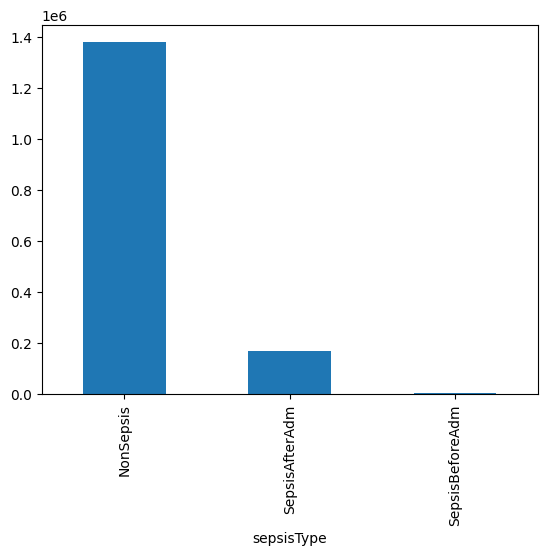

In [19]:
df['sepsisType'].value_counts().plot.bar()


In [20]:
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072,NonSepsis
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072,NonSepsis
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072,NonSepsis
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072,NonSepsis
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072,NonSepsis


Age distribution:
Age
67.00    22188
68.00    21752
65.00    20587
71.00    20543
66.00    20029
         ...  
43.21        8
20.18        8
44.85        8
40.26        8
44.06        8
Name: count, Length: 5987, dtype: int64 



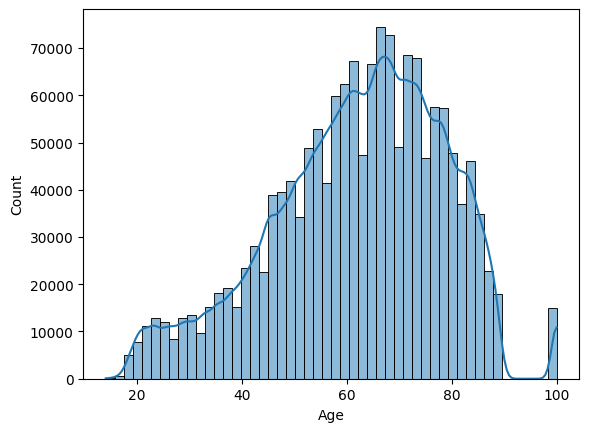

In [21]:
print("Age distribution:")
print(df['Age'].value_counts(), "\n")

# Distribution plot of age
sns.histplot(df['Age'], stat='count', bins=50, kde=True)
plt.show()

In [22]:
#total no:of patients
len(pd.unique(df['Patient_ID']))

40336

In [23]:
#total number of septic patients whose are sepsis after admission
len(pd.unique(sepsis_after_adm_df['Patient_ID']))

len(pd.unique(non_septic_df['Patient_ID']))

37404

In [24]:
#total no:of septic patients
len(pd.unique(septic_df['Patient_ID']))

2932

In [25]:
#total number of septic patients whose are sepsis before admission
len(pd.unique(admitted_with_sepsis_df['Patient_ID']))

426

Calculation of SIRS Score


SIRS - Systemic Inflammatory Response Syndrome

https://www.mdcalc.com/calc/1096/sirs-sepsis-septic-shock-criteria ( use this link to check the criteria for SIRS score calculation)

SIRS with a suspected source of infection is termed sepsis. Confirmation of infection with positive cultures is therefore not mandatory, at least in the early stages. Sepsis with one or more end-organ failures is called severe sepsis, and hemodynamic instability despite intravascular volume repletion is called septic shock

The SIRS criteria include abnormalities in body temperature, heart rate, respiratory rate, and white blood cell count. An increase in the SIRS score typically indicates a greater degree of systemic inflammation, which can be indicative of worsening sepsis. However, it's important to note that the SIRS criteria alone are not enough to diagnose sepsis definitively; they are just one component of the clinical assessment.

In [26]:
condition=(np.isnan(df['Temp'])& np.isnan(df['HR'])& np.isnan(df['Resp']) &np.isnan(df['WBC']))

In [27]:
df['hasSIRS'] = np.where(condition, 1, 0)

In [28]:
df['hasSIRS'].value_counts()

hasSIRS
0    1408039
1     144171
Name: count, dtype: int64

In [29]:
condition_temp=(df['Temp']>38) |( df['Temp']<36)
condition_HR=(df['HR']>90)
condition_Resp=(df['Resp']>20) |( df['PaCO2']<32)
condition_wbc=(df['WBC']>12000) |( df['WBC']<4000)

In [30]:
df['SIRS_Score']=np.where(condition_temp, 1, 0)+np.where(condition_HR, 1, 0)+np.where(condition_Resp, 1, 0)+np.where(condition_wbc, 1, 0)

In [31]:
df['SIRS_Score'].value_counts()

SIRS_Score
0    770512
1    532866
2    221739
3     26056
4      1037
Name: count, dtype: int64

<Axes: xlabel='SIRS_Score'>

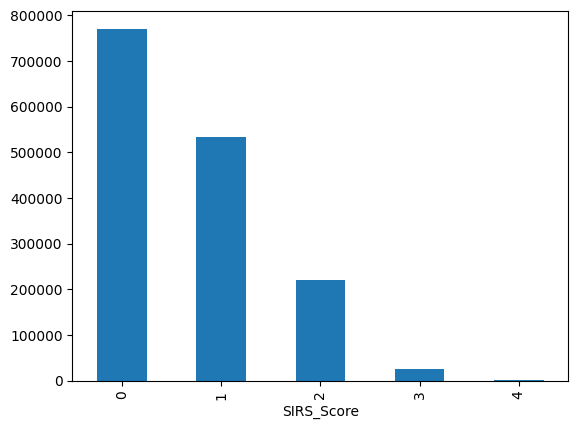

In [32]:
df['SIRS_Score'].value_counts().plot.bar()

In [33]:
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType,hasSIRS,SIRS_Score
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,-0.02,1,0,17072,NonSepsis,1,0
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,0,NaN,NaN,-0.02,2,0,17072,NonSepsis,0,0
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,0,NaN,NaN,-0.02,3,0,17072,NonSepsis,0,0
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,0,NaN,NaN,-0.02,4,0,17072,NonSepsis,0,0
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,0,NaN,NaN,-0.02,5,0,17072,NonSepsis,0,1


In [34]:
modified_df = df.dropna()

In [35]:
modified_df.shape

(0, 47)

Stage 2 of mortality analysis of sepsis

In [36]:
#Load data from csv file to dataframe
sepsis_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sepsis_survival_primary_cohort.csv')

print(sepsis_data.shape)

(110204, 4)


In [37]:
#Description of Features
'''

age_years: Age (in years) of the subject [integer]

sex_0male_1female: Gender of the subject - 0 represents Male, 1 represents Female [binary]

episode_number: Subject's n-th episode of sepsis [integer]

Description of Label (Outcome):

hospital_outcome_1alive_0dead: Outcome during that hospital episode -
 0 represents that the patient is deceased,
 1 represents that the patient survived [binary] '''

"\n\nage_years: Age (in years) of the subject [integer]\n\nsex_0male_1female: Gender of the subject - 0 represents Male, 1 represents Female [binary]\n\nepisode_number: Subject's n-th episode of sepsis [integer]\n\nDescription of Label (Outcome):\n\nhospital_outcome_1alive_0dead: Outcome during that hospital episode -\n 0 represents that the patient is deceased,\n 1 represents that the patient survived [binary] "

In [38]:
sepsis_data.rename(columns={"sex_0male_1female": "gender", "hospital_outcome_1alive_0dead": "hospital_outcome"}, inplace=True)

print(sepsis_data.head())

   age_years  gender  episode_number  hospital_outcome
0         21       1               1                 1
1         20       1               1                 1
2         21       1               1                 1
3         77       0               1                 1
4         72       0               1                 1


In [39]:
# Check for missing values
sepsis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   age_years         110204 non-null  int64
 1   gender            110204 non-null  int64
 2   episode_number    110204 non-null  int64
 3   hospital_outcome  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


In [40]:
sepsis_data.describe() # different statistic measures

,age_years,gender,episode_number,hospital_outcome
count,110204.000000,110204.000000,110204.000000,110204.000000
mean,62.735255,0.473948,1.349379,0.926455
std,24.126806,0.499323,0.751799,0.261031
min,0.000000,0.000000,1.000000,0.000000
25%,51.000000,0.000000,1.000000,1.000000
50%,68.000000,0.000000,1.000000,1.000000
75%,81.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


Age distribution:
age_years
82     2665
84     2621
81     2541
83     2523
80     2520
       ... 
10      159
14      153
13      151
100     128
99       84
Name: count, Length: 101, dtype: int64 



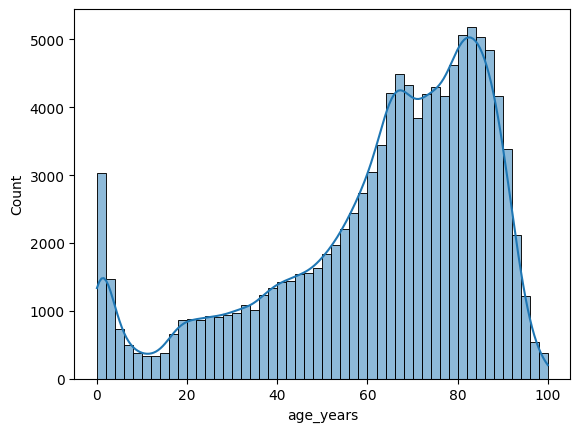

In [41]:
print("Age distribution:")
print(sepsis_data['age_years'].value_counts(), "\n")

# Distribution plot of age
sns.histplot(sepsis_data['age_years'], stat='count', bins=50, kde=True)
plt.show()

Gender:
gender
0    0.526052
1    0.473948
Name: proportion, dtype: float64 



<ipython-input-42-56da8cd1230f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sepsis_data['gender'], palette="ch:s=.25,rot=-.25")


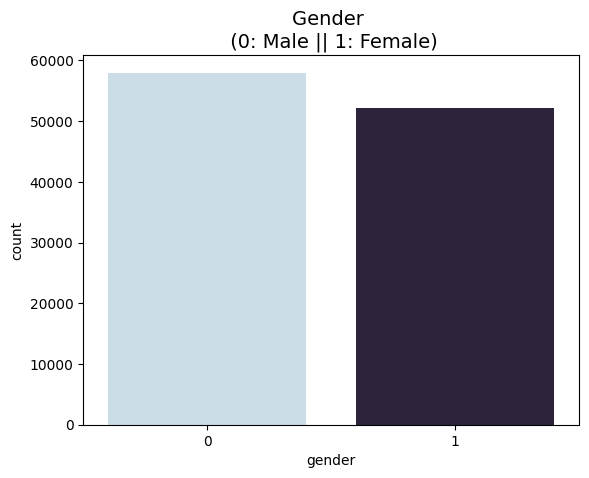

In [42]:
# 0 represents Male, 1 represents Female

print("Gender:")
print(sepsis_data['gender'].value_counts(normalize=True), "\n")

# Plot gender counts
sns.countplot(x=sepsis_data['gender'], palette="ch:s=.25,rot=-.25")
plt.title('Gender \n (0: Male || 1: Female)', fontsize=14)

plt.show()

Episode Number:
episode_number
1    0.769582
2    0.151428
3    0.049027
4    0.019954
5    0.010009
Name: proportion, dtype: float64 



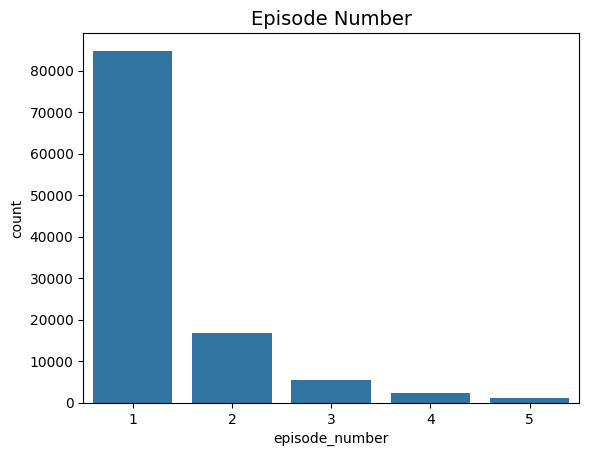

In [43]:
print("Episode Number:")
print(sepsis_data['episode_number'].value_counts(normalize=True), "\n")

# Plot episode number counts
sns.countplot(x=sepsis_data['episode_number'])
plt.title('Episode Number', fontsize=14)

plt.show()

Epsiode number clearly depicts how many times people are affected with sepsis

Hospital Outcome:
hospital_outcome
1    0.926455
0    0.073545
Name: proportion, dtype: float64 



<ipython-input-44-f24bd9ad908c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sepsis_data['hospital_outcome'], palette="husl")


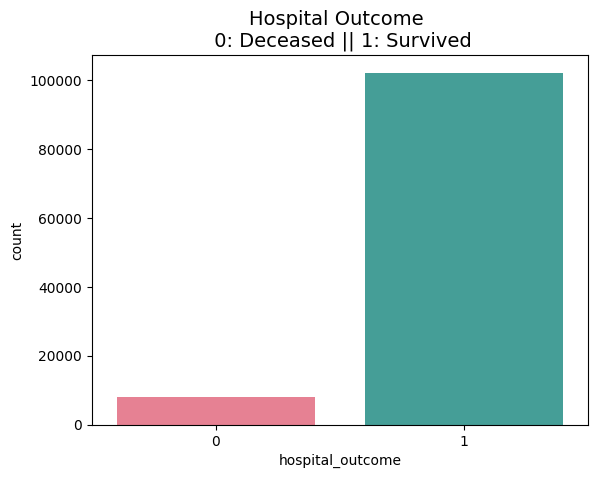

In [44]:
print("Hospital Outcome:")
print(sepsis_data['hospital_outcome'].value_counts(normalize=True),"\n")

# Plot Outcomes
sns.countplot(x=sepsis_data['hospital_outcome'], palette="husl")
plt.title('Hospital Outcome \n 0: Deceased || 1: Survived', fontsize=14)

plt.show()

Pre-processing of dataset for training and testing

In [45]:
# Create sepsis_data_Y to store the label (hospital_outcome)
sepsis_data_Y = sepsis_data['hospital_outcome']

print(sepsis_data_Y.shape)
print(sepsis_data_Y.head())

(110204,)
0    1
1    1
2    1
3    1
4    1
Name: hospital_outcome, dtype: int64


In [46]:
# Create sepsis_data_X to store the features
sepsis_data_X = sepsis_data.iloc[:, 0:3]

print(sepsis_data_X.shape)
print(sepsis_data_X.head())


(110204, 3)
   age_years  gender  episode_number
0         21       1               1
1         20       1               1
2         21       1               1
3         77       0               1
4         72       0               1


In [47]:
# Encode categorical features (gender)
sepsis_data_X_categorical = ['gender']
sepsis_data_X = pd.get_dummies(sepsis_data_X, columns=sepsis_data_X_categorical)

print(sepsis_data_X.shape)
print(sepsis_data_X.head())

(110204, 4)
   age_years  episode_number  gender_0  gender_1
0         21               1     False      True
1         20               1     False      True
2         21               1     False      True
3         77               1      True     False
4         72               1      True     False


In [48]:
# Rename gender columns for clarity
# gender_0 -> gender_male
# gender_1 -> gender_female
sepsis_data_X.rename(columns={"gender_0": "gender_male", "gender_1": "gender_female"}, inplace=True)

print(sepsis_data_X.head())

   age_years  episode_number  gender_male  gender_female
0         21               1        False           True
1         20               1        False           True
2         21               1        False           True
3         77               1         True          False
4         72               1         True          False


In [49]:
sepsis_data_X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   age_years       110204 non-null  int64
 1   episode_number  110204 non-null  int64
 2   gender_male     110204 non-null  bool 
 3   gender_female   110204 non-null  bool 
dtypes: bool(2), int64(2)
memory usage: 1.9 MB


Splitting the dataset with train_test_split

In [50]:
from sklearn.model_selection import train_test_split

# Split the dataset for training (80%) & testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(sepsis_data_X, sepsis_data_Y, test_size = 0.2, random_state = 10)

# Print the shape of the training & testing dataset
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (88163, 4)
X_test: (22041, 4)
Y_train: (88163,)
Y_test: (22041,)


Transform the data for easier computation and processing

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the StandardScaler using the training (X_train) dataset
# Then, scale both X_train & X_test
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
# Convert the ndarray back into a pandas dataframe
X_train = pd.DataFrame(X_train, columns = ['age_years','episode_number','gender_male', 'gender_female'])
X_test = pd.DataFrame(X_test, columns = ['age_years','episode_number','gender_male', 'gender_female'])

print(X_train.shape)
print(X_train, "\n")
print(X_test.shape)
print(X_test)

(88163, 4)
       age_years  episode_number  gender_male  gender_female
0       0.384629       -0.465122    -1.055639       1.055639
1       0.757947       -0.465122    -1.055639       1.055639
2      -2.601907       -0.465122    -1.055639       1.055639
3       0.840906       -0.465122    -1.055639       1.055639
4       0.923865       -0.465122    -1.055639       1.055639
...          ...             ...          ...            ...
88158   0.301670       -0.465122    -1.055639       1.055639
88159   0.384629       -0.465122    -1.055639       1.055639
88160   0.052792       -0.465122    -1.055639       1.055639
88161  -2.601907        0.864834    -1.055639       1.055639
88162  -2.518948        2.194791     0.947294      -0.947294

[88163 rows x 4 columns] 

(22041, 4)
       age_years  episode_number  gender_male  gender_female
0      -2.601907       -0.465122     0.947294      -0.947294
1      -0.942720       -0.465122    -1.055639       1.055639
2      -0.569403       -0.465122   

Prediction of the mortality using predefined ML Models

In [53]:
# Import sklearn models that will be used for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

# Define function to measure error
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)


# Define function to evaluate model & display confusion matrix
def evaluate_model(model):
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Compute accuracy, precision, recall, F1
    train_test_error = pd.concat([measure_error(Y_train, Y_train_pred, 'train'),
                                    measure_error(Y_test, Y_test_pred, 'test')],
                                    axis=1)
    # Confusion matrix
    cm = confusion_matrix(Y_test, Y_test_pred)
    disp = ConfusionMatrixDisplay(cm)

    print(train_test_error, "\n")
    print(classification_report(Y_test, Y_test_pred), "\n")

    return disp.plot()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefined

              train      test
accuracy   0.926738  0.925321
precision  0.858843  0.856219
recall     0.926738  0.925321
f1         0.891500  0.889430 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1646
           1       0.93      1.00      0.96     20395

    accuracy                           0.93     22041
   macro avg       0.46      0.50      0.48     22041
weighted avg       0.86      0.93      0.89     22041
 



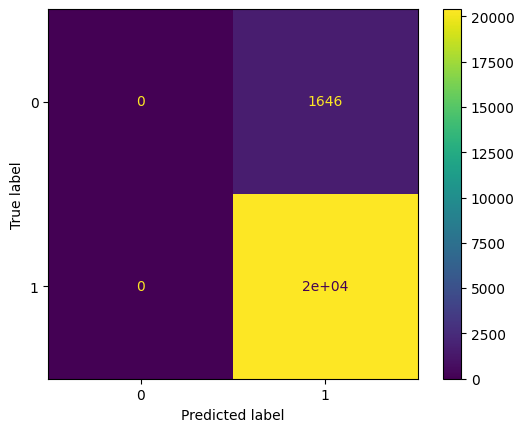

In [55]:
# Applying the Logistic Regression Algorithm

classifier_LR = LogisticRegression(random_state = 10)

evaluate_model(classifier_LR)

Addressing Data Imbalance with Over & Under-Sampling


 Defining a function to Evaluate key Parameters after Sampling - "evaluate_model_modified

In [56]:
# Defining a function to evaulate key parameters after sampling

def evaluate_model_modified(model):
    model.fit(X_train_modified, Y_train_modified)
    Y_train_pred = model.predict(X_train_modified)
    Y_test_pred = model.predict(X_test)

    # Compute accuracy, precision, recall, F1
    train_test_error = pd.concat([measure_error(Y_train_modified, Y_train_pred, 'train'),
                                    measure_error(Y_test, Y_test_pred, 'test')],
                                    axis=1)

    # Compute ROC-AUC score
    Y_test_score = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(Y_test, Y_test_score)

    # Confusion matrix
    cm = confusion_matrix(Y_test, Y_test_pred)
    disp = ConfusionMatrixDisplay(cm)

    print(train_test_error, "\n")
    print("ROC-AUC score:", auc_score, "\n")
    print(classification_report(Y_test, Y_test_pred), "\n")

    return disp.plot()

Attempting Random Oversampling of the training **dataset**

Oversampling involves randomly duplicating observations from the minority class in order to reinforce its signal.

Below, the dataset will be oversampled such that there is an equal ratio of majority and minority class. Then re-evaluate the model using the oversampled dataset using logistic regression.

(163408, 4)
(163408,)
              train      test
accuracy   0.649968  0.573976
precision  0.654688  0.901022
recall     0.649968  0.573976
f1         0.647278  0.671322 

ROC-AUC score: 0.7079440020708863 

              precision    recall  f1-score   support

           0       0.12      0.74      0.21      1646
           1       0.96      0.56      0.71     20395

    accuracy                           0.57     22041
   macro avg       0.54      0.65      0.46     22041
weighted avg       0.90      0.57      0.67     22041
 



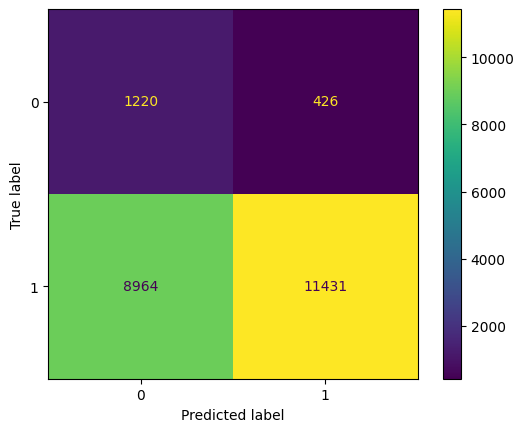

In [57]:
from sklearn.metrics import roc_auc_score
# Using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=10)
X_train_modified, Y_train_modified = ros.fit_resample(X_train, Y_train)

print(X_train_modified.shape)
print(Y_train_modified.shape)

# Reevaluate using Logistic Regression
classifier_LR = LogisticRegression(random_state = 10)
evaluate_model_modified(classifier_LR)

With random oversampling, there was a large decrease in the training/testing accuracy from >92% to 65.1% and 57.5% respectively. The variance between training & testing accuracy also increased. This could have happened as "noise" from the minority dataset will also be amplified.

Despite that, the model is now able to predict the minority class labels where Class = 0 (Patients who were deceased). The recall for class 0 is 0.74, which means that the model is able to predict & detect 74% of patients who died due to sepsis.

This makes the model more meaningful as it is important to identify patients who are at higher risk of death, so that healthcare professionals can dedicate more attention to their care.

**Attempting Random Undersampling of the training dataset**

Undersampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

Below, the dataset will be undersampled such that there is an equal ratio of majority and minority class. Then re-evaluate the model using the undersampled dataset using logistic regression.

(12918, 4)
(12918,)
              train      test
accuracy   0.651881  0.575428
precision  0.656477  0.901140
recall     0.651881  0.575428
f1         0.649306  0.672548 

ROC-AUC score: 0.7079891909990328 

              precision    recall  f1-score   support

           0       0.12      0.74      0.21      1646
           1       0.96      0.56      0.71     20395

    accuracy                           0.58     22041
   macro avg       0.54      0.65      0.46     22041
weighted avg       0.90      0.58      0.67     22041
 



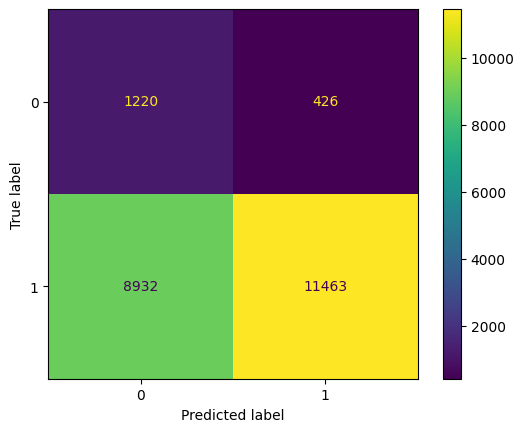

In [58]:
# Use RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10)
X_train_modified, Y_train_modified = rus.fit_resample(X_train, Y_train)

print(X_train_modified.shape)
print(Y_train_modified.shape)

# Reevaluate undersampled dataset using Logistic Regression
classifier_LR = LogisticRegression(random_state = 10)
evaluate_model_modified(classifier_LR)

Use of RandomUnderSampler for undersampling appears to give similar results to the use of oversampled datasets with RandomOverSampler and SMOTE.

Likewise, the accuracy decreased for both the training and testing dataset, and variance increased. This may be due to potentially useful information being discarded.

Despite that, the model will now be better able to predict Class 0 labels.

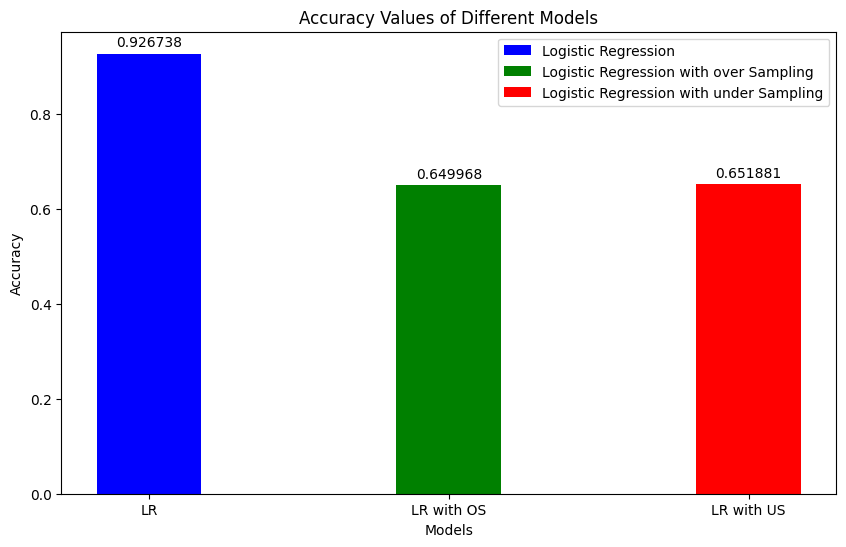

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
model_names = ['LR', 'LR with OS', 'LR with US']
precision_values = [0.926738, 0.649968, 0.651881]

# Creating the bar chart
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
bars = ax.bar(x, precision_values, width, label=['Logistic Regression','Logistic Regression with over Sampling','Logistic Regression with under Sampling'], color=['blue', 'green', 'red'])

# Adding labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Values of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Adding precision value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.show()
